In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import math
import random
from scipy.stats import gaussian_kde

In [2]:
file = open('ex9_data.csv')
read=csv.reader(file)
d = list(read)
file.close()
#print(data)
i=1
data=[]
while i<=603:
    l=d[i]
    data.append(float(l[1]))
    i=i+1
ddd=np.array(data)

# histogram

Text(0.5, 1.0, 'Distribution of data')

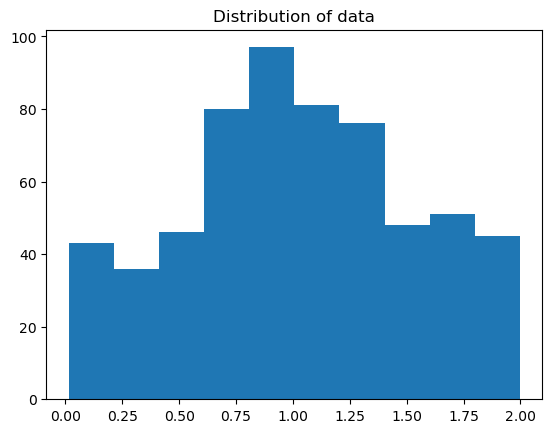

In [4]:
plt.hist(data,bins=10)
plt.title("Distribution of data")

# p.d.f

In [5]:
def L(s, b):
    l=1
    for x in ddd:
        fs=4/(math.erf(2*2**(1/2))*(2*math.pi)**(1/2))*math.exp(-1/2*16*(x-1)**2)
        fb=1/2       
        f=s/(s+b)*fs+b/(s+b)*fb
        l=l*f
    return l

0.9983965742520304


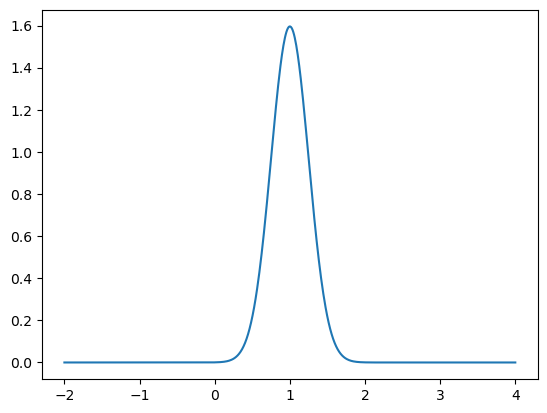

In [6]:
x= np.array(np.linspace(-2,4,600))
y=[]
#4/(math.erf(2*2**(1/2))*(2*math.pi)**(1/2))
for i in x:
    y.append(4/(math.erf(2*2**(1/2))*(2*math.pi)**(1/2))*math.exp(-1/2*16*(i-1)**2))
plt.plot(x,y)
dx=0.01
area=np.sum(dx*np.array(y))
print(area)


Text(0.5, 1.0, 'Extended log-likelihood distribution')

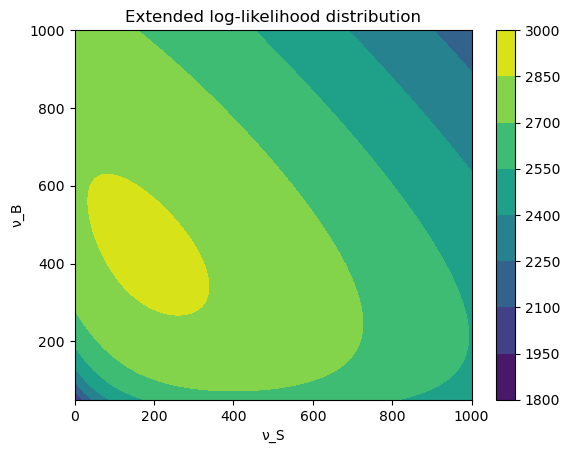

In [33]:
s=np.linspace(0,1000,300)
b=np.linspace(50,1000,100)
#logL=-(s+b)+math.log((s+b)*fx)
S, B=np.meshgrid(s,b)
Z=np.log(L(S,B))-(S+B)+np.log(S+B)*len(data)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(S, B, Z)
fig.colorbar(cp) # Add a colorbar to a plot
plt.xlabel("\u03BD_S")
plt.ylabel("\u03BD_B")
plt.title("Extended log-likelihood distribution")

In [34]:
ML=[]
for i in s:
    for j in b:
        ML.append(np.log(L(i,j))-(i+j)+np.log(i+j)*len(data))
#print(len(ML))
position=np.nanargmax(ML)
s_pos=1000*(position//100)/(300-1)
b_pos=50+950*(position%100)/(100-1)
print(s_pos,b_pos)

177.25752508361205 424.24242424242425


# find v_B

179.3


Text(0, 0.5, 'log-likelihood')

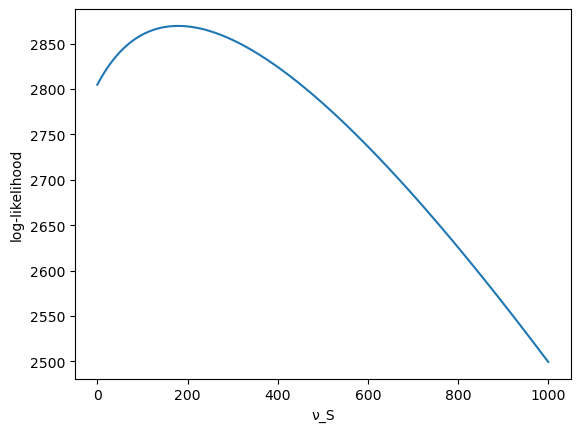

In [19]:
s=np.linspace(0,1000,10000)
ML=[]
for i in s:
    ML.append(np.log(L(i,420.7))-(i+420.7)+np.log(i+420.7)*len(data))
position=np.nanargmax(ML)
print(position/10)
plt.plot(s,ML)
plt.xlabel("\u03BD_S")
plt.ylabel("log-likelihood")

(array([0.3597721 , 0.30120455, 0.38487248, 0.66934344, 0.81157892,
        0.67771023, 0.63587627, 0.40160606, 0.42670644, 0.37650569]),
 array([0.01522954, 0.21343868, 0.41164781, 0.60985694, 0.80806608,
        1.00627521, 1.20448434, 1.40269348, 1.60090261, 1.79911174,
        1.99732087]),
 <BarContainer object of 10 artists>)

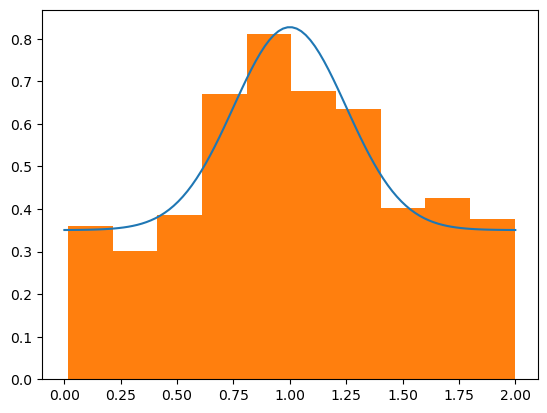

In [16]:
vs=179.3
vb=420.7
x=np.linspace(0,2,100)
y=[]
for i in x:
    fs=4/(math.erf(2*2**(1/2))*(2*math.pi)**(1/2))*math.exp(-1/2*16*(i-1)**2)
    fb=1/2       
    f=vs/(vs+vb)*fs+vb/(vs+vb)*fb
    y.append(f)
plt.plot(x,y)
plt.hist(data,density=True,bins=10)

# Likelihood Variation

Text(0.5, 1.0, 'Normalized likelihood distribution')

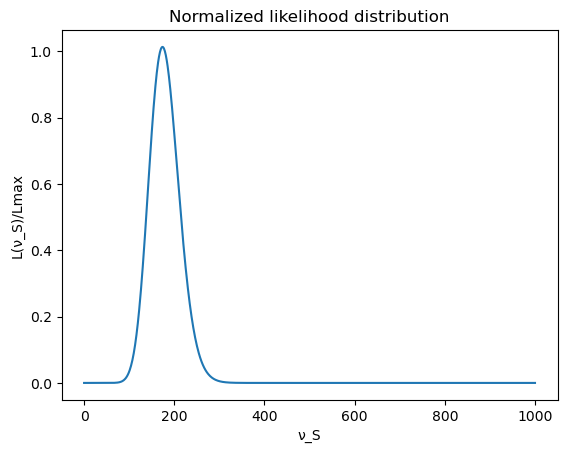

In [22]:
vs=np.linspace(0,1000,1000)
vsL=[]
for i in vs:
    vsL.append(L(i,420.7)/L(179.3,420.7))
plt.plot(vs,vsL)
plt.xlabel("\u03BD_S")
plt.ylabel("L(\u03BD_S)/Lmax")
plt.title("Normalized likelihood distribution")

# weighted hist

(array([0.00247131, 0.03161226, 0.10276461, 0.17628558, 0.23213702,
        0.21359514, 0.1207306 , 0.08789025, 0.0258539 , 0.00665933]),
 array([ 80.26864359, 100.19788456, 120.12712554, 140.05636652,
        159.9856075 , 179.91484847, 199.84408945, 219.77333043,
        239.70257141, 259.63181238, 279.56105336]),
 <BarContainer object of 10 artists>)

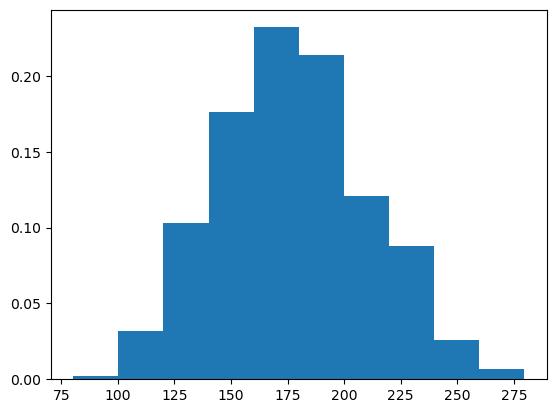

In [24]:
x=[]
i=0
while i<300:
    x.append(random.uniform(80,280))
    i=i+1

x.sort()
weight=[]
for i in x:
    weight.append(L(i,420.7)/L(179.3,420.7))
    
sum=0
for i in weight:
    sum=sum+i
weights=[]
for i in weight:
    weights.append(i/sum)
    
plt.hist(x,weights=weights)
#plt.plot(vs,vsL)

# Gaussian kernel

[Text(0, 0.5, 'posterior')]

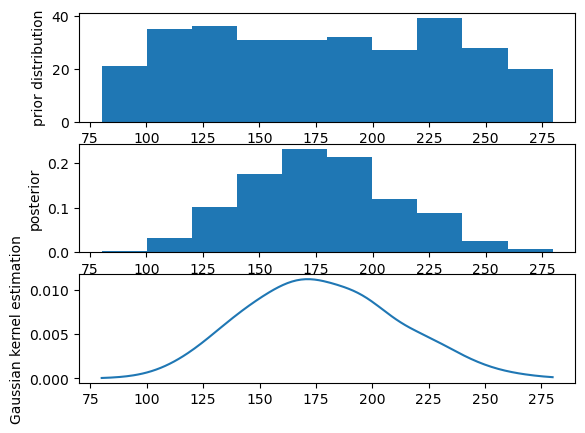

In [29]:
scipy_kernel=gaussian_kde(x, weights=weights)
u=np.linspace(80,280,200)
v=scipy_kernel.evaluate(u)

fig, axs = plt.subplots(3)
axs[0].hist(x)
axs[0].set(ylabel="prior distribution")
axs[2].plot(u, v)
axs[2].set(ylabel="Gaussian kernel estimation")
axs[1].hist(x,weights=weights)
axs[1].set(ylabel="posterior")

# prior=gaussian(250,50)

[Text(0, 0.5, 'Gaussian kernel estimaiton')]

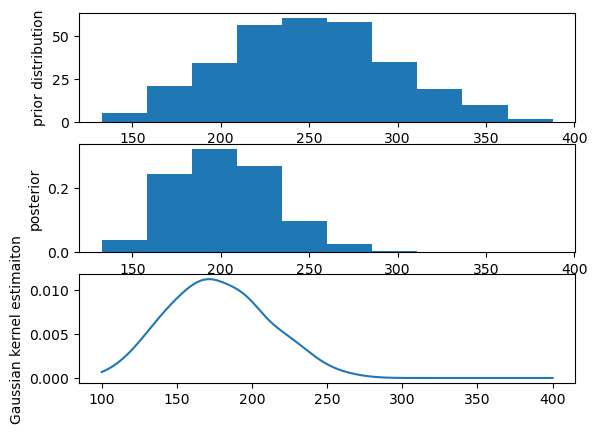

In [28]:
y=[]
i=0
while i<300:
    y.append(np.random.normal(250,50))
    i=i+1
y.sort()
y_weight=[]
for i in y:
    y_weight.append(L(i,420.7)/L(179.3,420.7))
    
sum=0
for i in y_weight:
    sum=sum+i
y_weights=[]
for i in y_weight:
    y_weights.append(i/sum)
    
scipy_kernel=gaussian_kde(x, weights=weights)
uu=np.linspace(100,400,300)
vv=scipy_kernel.evaluate(uu)

fig, axs = plt.subplots(3)
axs[0].hist(y)
axs[0].set(ylabel="prior distribution")
axs[1].hist(y,weights=y_weights)
axs[1].set(ylabel="posterior")
axs[2].plot(uu,vv)
axs[2].set(ylabel="Gaussian kernel estimaiton")

# 2d and uniform prior

Text(0.5, 1.0, 'Posterior with uniform prior')

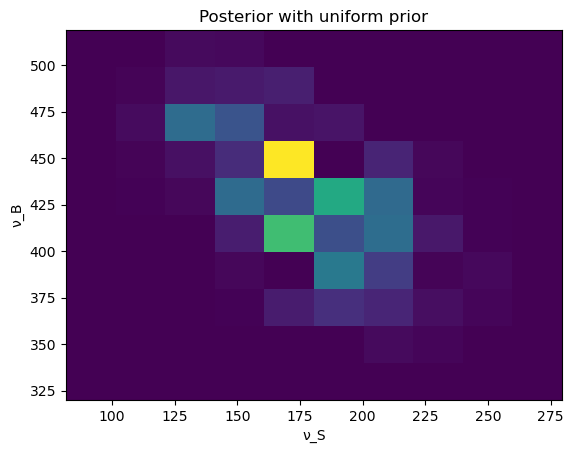

In [30]:
i=0
s=[]
b=[]
while i<300:
    s.append(random.uniform(80,280))
    b.append(random.uniform(320,520))
    #s.append(np.random.normal(80,20))
    #b.append(np.random.normal(300,20))
    i=i+1
r=0
weight=[]
while r<300:
    logL=np.log(L(s[r],b[r]))-(s[r]+b[r])+np.log(s[r]+b[r])*len(data)
    logLM=np.log(L(s_pos,b_pos))-(s_pos+b_pos)+np.log(s_pos+b_pos)*len(data)
    weight.append(math.exp(logL-logLM))
    r=r+1

                  
summm=np.sum(weight)
weightss=[]

k=0
while k<300:
    weightss.append(weight[k]/summm)
    k=k+1


#print(weightss)
    
plt.hist2d(s,b,weights=weightss)
plt.xlabel("\u03BD_S")
plt.ylabel("\u03BD_B")
plt.title("Posterior with uniform prior")

Text(0.5, 1.0, 'Posterior with one uniform and one gaussian prior')

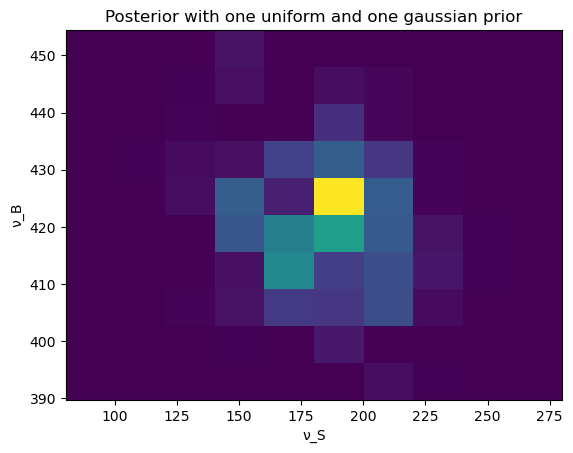

In [31]:
i=0
s=[]
b=[]
while i<300:
    s.append(random.uniform(80,280))
    #b.append(random.uniform(320,520))
    #s.append(np.random.normal(80,20))
    b.append(np.random.normal(420.7,10))
    i=i+1
r=0
weight=[]
while r<300:
    logL=np.log(L(s[r],b[r]))-(s[r]+b[r])+np.log(s[r]+b[r])*len(data)
    logLM=np.log(L(s_pos,b_pos))-(s_pos+b_pos)+np.log(s_pos+b_pos)*len(data)
    weight.append(math.exp(logL-logLM))
    r=r+1

                  
summm=np.sum(weight)
weightss=[]

k=0
while k<300:
    weightss.append(weight[k]/summm)
    k=k+1


#print(weightss)
    
plt.hist2d(s,b,weights=weightss)
plt.xlabel("\u03BD_S")
plt.ylabel("\u03BD_B")
plt.title("Posterior with one uniform and one gaussian prior")